# Term 1 & 2 Project - EDA for Wine Dataset

#### Analysis done by Clifer Fernandez  - April 2020 cohort

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Analysis through Questions](#section4)
    - 4.1 [How is the data spread in the newly created catagories?](#section401)<br/>
    - 4.2 [How are the ingredients correlated to each other?](#section402)<br/>
    - 4.3 [What are the variables that correlate with the Quality rating?](#section403)<br/>
    - 4.4 [What are the variables that correlate with the Alcohol Content?](#section404)<br/>
    - 4.5 [What are the variables that correlate with the Density of a wine?](#section405)<br/>
    - 4.6 [What are the variables that correlate with the Chloride Content?](#section406)<br/>
    - 4.7 [What are the variables that correlate with the Volatile Acidity?](#section407)<br/>
5. [Conclusions](#section5)<br/>  
6. [Recommendations](#section6)<br/>  

<a id=section1></a>

### 1. Problem Statement

**CAN THE QUALITY OF A WINE BE PREDICTED BY CLOSELY SCRUTINIZING IT'S PHYSIOCHEMICAL PROPERTIES?**

**Quality of a wine** is  best assessed by tasting. It cannot be ascertained just by reading the label on a bottle. But is there a way to determine the quaility if we have its physiochemical properties?

We are presented with a dataset that contains  measurements taken on a number of wine samples during testing.  11 different physicochemical properties of wine from lab tests, along with a 'Sensory Test' -  Quality of Wine, a sensory test that rely on a human, are provided. Based on this information, we will try to acertain what levels of the various ingredients would make a good quality wine.

*Note of Caution : Human senses, like taste, are the least understood. And therefore its use in classification of wines makes this a very complex relationship which is still not fully understood.*

<a id=section2></a>

### 2. Data Loading and Description

- Dataset Description

| Column Name             | Description|
| :-----------------------|:-----------|
|  fixed acidity          | most acids involved with wine are fixed or nonvolatile (do not evaporate readily).|
| volatile acidity        | the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste. |
| citric acid             | found in small quantities, citric acid can add ‘freshness’ and flavor to wines|
| residual sugar          | the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.|
| chlorides               | the amount of salt in the wine.|
| free sulfur dioxide     | free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion. It prevents microbial growth and the oxidation of wine.                   |
|  total sulfur dioxide   | amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine|
| density                 | the density of water is close to that of water depending on the percentage of  alcohol and sugar content|
| pH                      | describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.|
| sulphates               | a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.|
| alcohol                 | the percent alcohol content of the wine.|
| quality                 | score between 0 to 10.|

#### Importing packages                                          

In [1]:
import numpy as np
np.set_printoptions(precision=4)                         # To display values only upto four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)           # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)              # To display all the data in each column
pd.options.display.max_columns = 50                      # To display every column of the dataset in head()

import pandas_profiling                                  # Pandas Profiling v2.8.0

from scipy import stats                                  # To run the Z score calculations

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                       # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns                                    # To adjust seaborn settings for the plots.
sns.set(style='whitegrid',
        palette="muted",                                 # Muted looks better for the charts!
        font_scale=1.3,                                  
        color_codes=True) 

import warnings
warnings.filterwarnings('ignore')                        # To suppress all the warnings in the notebook.


#### Importing the Dataset

In [2]:
df_wine = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv')

<a id=section3></a>

## 3. Data Profiling

- In the following sections we will first __inspect our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will check if any columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with any erronous and / or  missing values in the columns. 
- Re-run __pandas profiling__ to see how preprocessing has transformed our dataset.

<a id=section301></a>

### 3.1 Understanding the Dataset

###### Careful inspection of the dataset will allow gathering of valuble insights which will guide or way forward.

In [3]:
df_wine.info()                     # basic information of the dataframe                   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [4]:
df_wine.head()                      # view the first 5 records

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
df_wine.tail()                     # view the last 5 records

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
6492     11.2        6  
6493      9.6        5  
6494      9.4        6  
6495     12.8        7  
6496     11.8        6

In [6]:
df_wine.nunique()                  # number of unique items

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

In [7]:
df_wine = df_wine.round(decimals=3)             # round down the decimal places to 3 in the dataframe
round(df_wine.describe(include = 'all'),3)      # describe the data but round to 3 decimal places 

fixed acidity  volatile acidity  citric acid  residual sugar  \
count       6497.000          6497.000     6497.000        6497.000   
mean           7.215             0.340        0.319           5.443   
std            1.296             0.165        0.145           4.758   
min            3.800             0.080        0.000           0.600   
25%            6.400             0.230        0.250           1.800   
50%            7.000             0.290        0.310           3.000   
75%            7.700             0.400        0.390           8.100   
max           15.900             1.580        1.660          65.800   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
count   6497.000             6497.000              6497.000  6497.000   
mean       0.056               30.525               115.745     0.995   
std        0.035               17.749                56.522     0.003   
min        0.009                1.000                 6.000     0.987   
25%        0.038               17.000                77.000     0.992   
50%        0.047               29.000               118.000     0.995   
75%        0.065               41.000               156.000     0.997   
max        0.611              289.000               440.000     1.039   

             pH  sulphates   alcohol   quality  
count  6497.000   6497.000  6497.000  6497.000  
mean      3.219      0.531    10.492     5.818  
std       0.161      0.149     1.193     0.873  
min       2.720      0.220     8.000     3.000  
25%       3.110      0.430     9.500     5.000  
50%       3.210      0.510    10.300     6.000  
75%       3.320      0.600    11.300     6.000  
max       4.010      2.000    14.900     9.000

From the above preliminary data inspection we can gather the following:

- The data set consists of 6497 records with 12 columns
- There are no null datapoints
- All of the data are numeric in nature
- 11 columns have data of a continous nature and 1 column catagorical in nature
- There is very low variability in 8 of the parameters while 3 parameters have high variability with outliers


<a id=section302></a>

### 3.2 Pre Profiling

- An __interactive HTML report__ using Pandas Profiling is generated which contains:
- Detailed information about each column 
- Coorelation between the data in the different columns
- Sample of dataset
- A visual interpretation of each column in the data
- Spread of the data can be better understood by the distribution plot. 
- Grannular level analysis of each column.

In [8]:
profile_default = df_wine.profile_report(title='Pandas Profiling before Data Preprocessing') 
profile_default.to_file(output_file="Wine_Data_profiling_before_preprocessing.html")

#profile_default.to_notebook_iframe()       # embed output profiling report here into the Notebook itself

__Pandas Profiling indicates the following:__

- Dataset has **1179 (18.1%) duplicate rows**
- __Citric acid column has 151 (2.3%) zeros__
- Outliers observed in some of the data columns. These will have to be reviewed.


<a id=section303></a>

### 3.3 Preprocessing

- Dealing with duplicate data:
  - Review and Drop data that are duplicates
- Dealing with Outliers
  - From the Pandas Profiling, we deduce that there are outliers in the dataset that may skew our analysis.
  - We will use the Z-score of data in each column to identify and remove those records
      - http://colingorrie.github.io/outlier-detection.html

In [9]:
#copy ALL duplicates to new df to examine the nature of the duplicates

df_wine_alldup = df_wine[df_wine.duplicated(keep = False)] 

df_wine_alldup.head(10) 

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00            1.90      0.076   
4             7.4             0.700         0.00            1.90      0.076   
9             7.5             0.500         0.36            6.10      0.071   
11            7.5             0.500         0.36            6.10      0.071   
22            7.9             0.430         0.21            1.60      0.106   
27            7.9             0.430         0.21            1.60      0.106   
39            7.3             0.450         0.36            5.90      0.074   
40            7.3             0.450         0.36            5.90      0.074   
64            7.2             0.725         0.05            4.65      0.086   
65            7.2             0.725         0.05            4.65      0.086   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0    0.998  3.51       0.56   
4                  11.0                  34.0    0.998  3.51       0.56   
9                  17.0                 102.0    0.998  3.35       0.80   
11                 17.0                 102.0    0.998  3.35       0.80   
22                 10.0                  37.0    0.997  3.17       0.91   
27                 10.0                  37.0    0.997  3.17       0.91   
39                 12.0                  87.0    0.998  3.33       0.83   
40                 12.0                  87.0    0.998  3.33       0.83   
64                  4.0                  11.0    0.996  3.41       0.39   
65                  4.0                  11.0    0.996  3.41       0.39   

    alcohol  quality  
0       9.4        5  
4       9.4        5  
9      10.5        5  
11     10.5        5  
22      9.5        5  
27      9.5        5  
39     10.5        5  
40     10.5        5  
64     10.9        5  
65     10.9        5

In [10]:
# create new df - remove duplicated data. Reatain only the first occurence 

df_wine_remdup = df_wine.drop_duplicates(ignore_index=True) # ignore_index = True :- remove the added index col

df_wine_remdup.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0    0.998  3.51       0.56   
1                 25.0                  67.0    0.997  3.20       0.68   
2                 15.0                  54.0    0.997  3.26       0.65   
3                 17.0                  60.0    0.998  3.16       0.58   
4                 13.0                  40.0    0.998  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [11]:
df_wine_remdup.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
5313            6.2              0.21         0.29             1.6      0.039   
5314            6.6              0.32         0.36             8.0      0.047   
5315            6.5              0.24         0.19             1.2      0.041   
5316            5.5              0.29         0.30             1.1      0.022   
5317            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
5313                 24.0                  92.0    0.991  3.27       0.50   
5314                 57.0                 168.0    0.995  3.15       0.46   
5315                 30.0                 111.0    0.993  2.99       0.46   
5316                 20.0                 110.0    0.989  3.34       0.38   
5317                 22.0                  98.0    0.989  3.26       0.32   

      alcohol  quality  
5313     11.2        6  
5314      9.6        5  
5315      9.4        6  
5316     12.8        7  
5317     11.8        6

In [12]:
df_wine_remdup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5318 entries, 0 to 5317
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5318 non-null   float64
 1   volatile acidity      5318 non-null   float64
 2   citric acid           5318 non-null   float64
 3   residual sugar        5318 non-null   float64
 4   chlorides             5318 non-null   float64
 5   free sulfur dioxide   5318 non-null   float64
 6   total sulfur dioxide  5318 non-null   float64
 7   density               5318 non-null   float64
 8   pH                    5318 non-null   float64
 9   sulphates             5318 non-null   float64
 10  alcohol               5318 non-null   float64
 11  quality               5318 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 498.7 KB


- The dataset is now filtered for duplicate records and we have **5318** records in the dataset

**We can now plot the spread of the individual data columns for a quick overvew of the distribution**

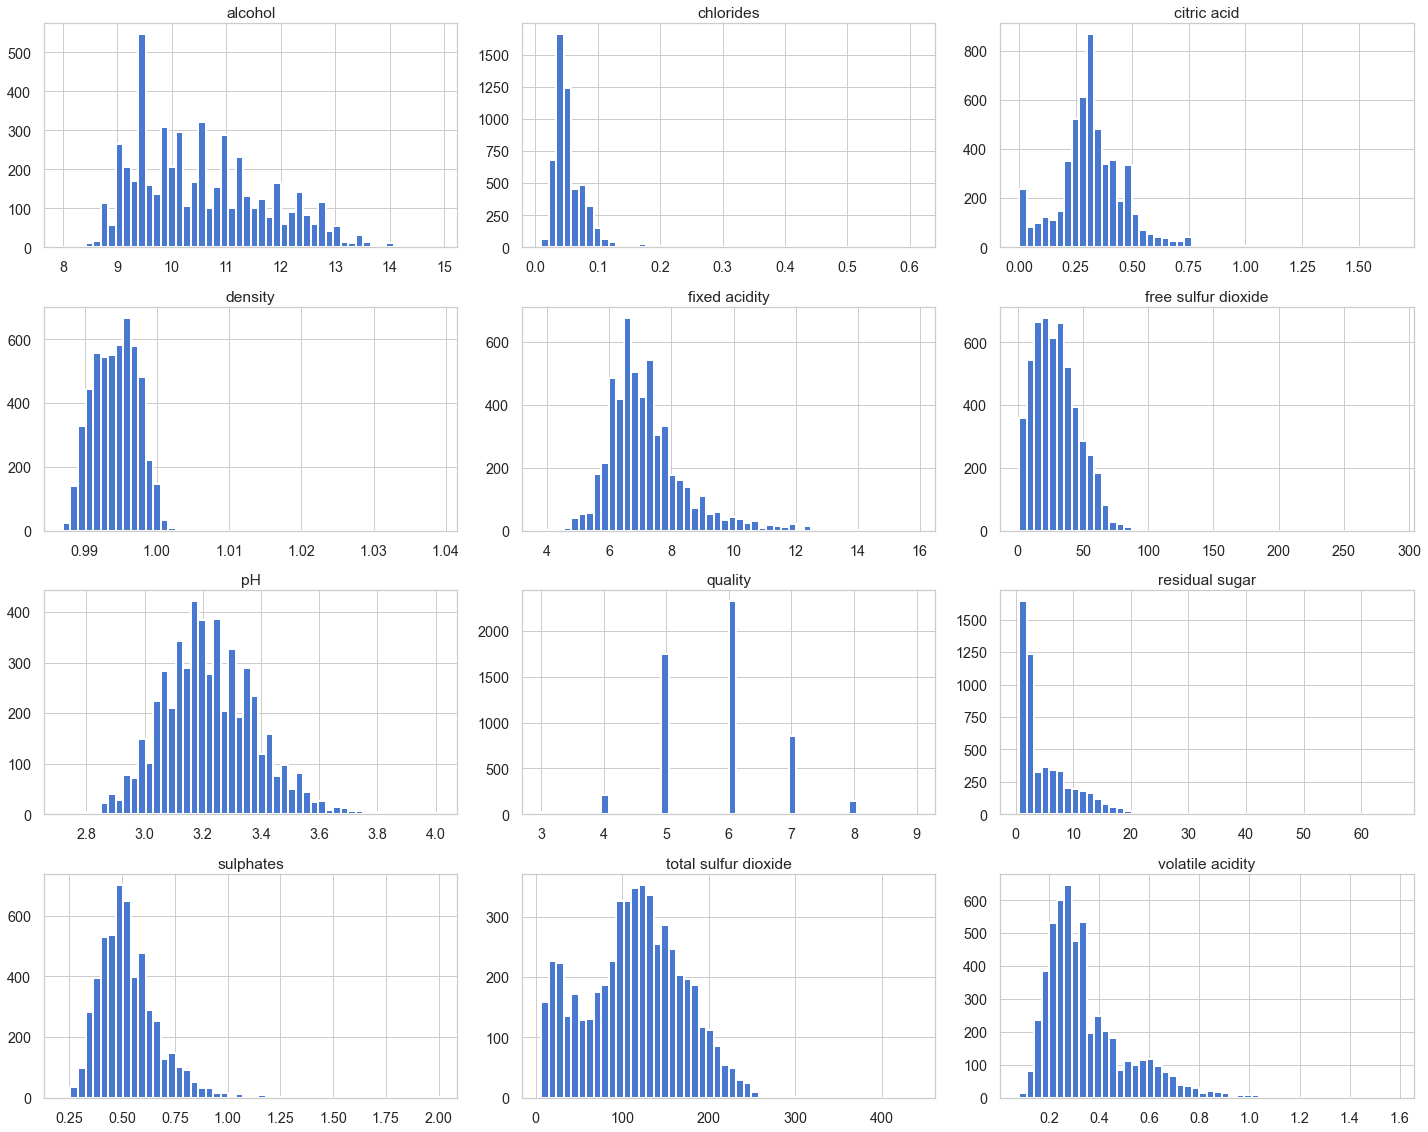

In [13]:
# Plot -  spread of data in each column

fig1 = df_wine_remdup.hist(bins=50,linewidth=2.0,figsize=(10,8))
plt.tight_layout(h_pad = 1, rect=(0, 0, 2, 2))

**We can now deal with outliers. In our case we will use the z score to identify and remove outliers with a threshold of - 4 to 4 to only remove extreme outliers**

In [14]:
z = np.abs(stats.zscore(df_wine_remdup))                   # get z score

df_wine_clean = df_wine_remdup[(z < 4).all(axis=1)]        # apply z score criteria to filter data
df_wine_clean.reset_index(inplace = True, drop = True)     # reset index

df_wine_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5163 entries, 0 to 5162
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5163 non-null   float64
 1   volatile acidity      5163 non-null   float64
 2   citric acid           5163 non-null   float64
 3   residual sugar        5163 non-null   float64
 4   chlorides             5163 non-null   float64
 5   free sulfur dioxide   5163 non-null   float64
 6   total sulfur dioxide  5163 non-null   float64
 7   density               5163 non-null   float64
 8   pH                    5163 non-null   float64
 9   sulphates             5163 non-null   float64
 10  alcohol               5163 non-null   float64
 11  quality               5163 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 484.2 KB


- We have filtered out **155 outliers** to get a final set of **5163** records

In [15]:
qcounts = df_wine_clean['quality'].value_counts()
qcounts

6    2264
5    1690
7     845
4     193
8     146
3      20
9       5
Name: quality, dtype: int64

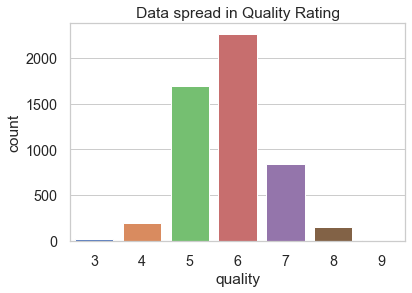

In [16]:
fig2 = sns.countplot(data = df_wine_clean, x = 'quality',).set_title("Data spread in Quality Rating")

- From the data spread we can clearly see that the data is concentrated to 3 major quality ratings - 5,6 & 7


| Quality Rating | Count |
| :-: |-------------: |
|        3       | 20    |
|        4       | 193   |
|        5       | 1690  |
|        6       | 2264  | 
|        7       | 845   |
|        8       | 146   |
|        9       | 5     |


*Since we have **concentration of data in primarily 3 quality ratings**, we can broadly catagorise them in groups for easier analysis*

- We introduce a new feature **q_grade**

|Quality Rating| Group |
|:---: | :---: 
|3,4 | Low |
|5,6 | Medium |
|7,8,9 | High | 


*Wine Body ie: how a wine feels like in the mouth*

- We also introduce another feature **wine_body** 
    - This is based on the alcohol content of the wine
    - <a>https://vinepair.com/wine-101/wine-body-guide/<a>

|Alcohol %| Body|
|:---: | :---: |
|<12.5 | Light |
|12.5 - 13.5| Medium |
|>13.5  | Full |


*How dry or sweet a wine is rated*

- We introduce another feature **dry_sweet** 
    - Dryness or sweetness of the wine depends on the residual sugar present  
    - <a>https://winefolly.com/deep-dive/sugar-in-wine-chart/<a>

|Residual Sugar Content| Dry / Sweet Rating|
|:---: | :---: |
|<1| Bone-dry|
|1 - 10| Dry|
|10 - 35| Off-Dry|
|35 - 120|Sweet|
|120 - 220|Very Sweet|


In [17]:
# Create new column q_grade to allow category bins of the wine quality
df_wine_clean['q_grade'] = df_wine_clean['quality'].apply(lambda x: ('low' if x < 5 else 'medium')if x < 7 else 'high')
df_wine_clean['q_grade'] = pd.Categorical(df_wine_clean['q_grade'], categories=['low', 'medium', 'high'])

# Create new column wine_body to catagorise wine based on 'feel of the wine'
df_wine_clean['wine_body'] = df_wine_clean['alcohol'].apply(lambda x: ('light' if x < 12.5 else 'medium')if x < 13.5 else 'full')
df_wine_clean['wine_body'] = pd.Categorical(df_wine_clean['wine_body'], categories=['light', 'medium', 'full'])

# Create new column dryness to catagorise wine based on sweetness of the wine
df_wine_clean['dry_sweet'] = df_wine_clean['residual sugar'].apply(lambda x: (((('bone dry' if x < 1 else 'dry')if x < 10 else 'off-dry')if x < 35 else 'sweet') if x < 120 else 'very sweet'))
df_wine_clean['dry_sweet'] = pd.Categorical(df_wine_clean['dry_sweet'], categories=['bone dry','dry', 'off-dry', 'sweet', 'very sweet'])

In [18]:
df_wine_clean.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0    0.998  3.51       0.56   
1                 25.0                  67.0    0.997  3.20       0.68   
2                 15.0                  54.0    0.997  3.26       0.65   
3                 17.0                  60.0    0.998  3.16       0.58   
4                 13.0                  40.0    0.998  3.51       0.56   

   alcohol  quality q_grade wine_body dry_sweet  
0      9.4        5  medium     light       dry  
1      9.8        5  medium     light       dry  
2      9.8        5  medium     light       dry  
3      9.8        6  medium     light       dry  
4      9.4        5  medium     light       dry

In [19]:
round(df_wine_clean.describe(include = 'all'), 3)

fixed acidity  volatile acidity  citric acid  residual sugar  \
count        5163.000          5163.000     5163.000        5163.000   
unique            NaN               NaN          NaN             NaN   
top               NaN               NaN          NaN             NaN   
freq              NaN               NaN          NaN             NaN   
mean            7.159             0.338        0.315           5.054   
std             1.208             0.160        0.140           4.399   
min             3.800             0.080        0.000           0.600   
25%             6.400             0.230        0.240           1.800   
50%             6.900             0.290        0.310           2.800   
75%             7.700             0.400        0.390           7.500   
max            12.400             1.010        0.880          22.600   

        chlorides  free sulfur dioxide  total sulfur dioxide   density  \
count    5163.000             5163.000              5163.000  5163.000   
unique        NaN                  NaN                   NaN       NaN   
top           NaN                  NaN                   NaN       NaN   
freq          NaN                  NaN                   NaN       NaN   
mean        0.054               30.044               114.812     0.994   
std         0.025               16.856                55.700     0.003   
min         0.009                1.000                 6.000     0.987   
25%         0.038               17.000                77.000     0.992   
50%         0.047               28.000               117.000     0.995   
75%         0.064               41.000               154.000     0.997   
max         0.204              101.000               303.000     1.003   

              pH  sulphates   alcohol   quality q_grade wine_body dry_sweet  
count   5163.000   5163.000  5163.000  5163.000    5163      5163      5163  
unique       NaN        NaN       NaN       NaN       3         3         3  
top          NaN        NaN       NaN       NaN  medium     light       dry  
freq         NaN        NaN       NaN       NaN    3954      4721      4264  
mean       3.226      0.527    10.558     5.809     NaN       NaN       NaN  
std        0.158      0.134     1.186     0.872     NaN       NaN       NaN  
min        2.720      0.220     8.000     3.000     NaN       NaN       NaN  
25%        3.120      0.430     9.500     5.000     NaN       NaN       NaN  
50%        3.220      0.510    10.400     6.000     NaN       NaN       NaN  
75%        3.330      0.600    11.400     6.000     NaN       NaN       NaN  
max        3.850      1.130    14.200     9.000     NaN       NaN       NaN

<a id=section304></a>

## 3.4 Post Profiling

In [20]:
# using the default config of Pandas Profiling generate a profile of the new dataframe and export to html

profile_final_exp = df_wine_clean.profile_report(title='Pandas Explorative Profiling after New Catagories and Outlier Removal')

profile_final_exp.to_file(output_file="Wine_data_profiling_after_preprocessing.html") # used this to output html file

#profile_final_exp.to_notebook_iframe()       # using this to insert the profiling report into the Notebook itself

Observations:
- Dataset now has **15** variables - **12** Numeric and **3** Catagorical 
- Number of records - **5163**
- No missing data 
- No duplicate records

<a id=section4></a>

### 4. Analysis through Questions

<a id=section401></a>

### 4.1 How is the data spread in the newly created catagories ?

In [21]:
df_wine_clean['q_grade'].value_counts()

medium    3954
high       996
low        213
Name: q_grade, dtype: int64

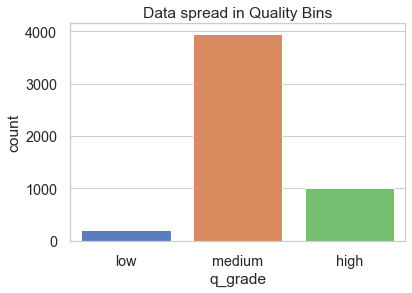

In [22]:
fig3 = sns.countplot(data = df_wine_clean, x = 'q_grade',).set_title("Data spread in Quality Bins")

- Here we obseve that a majority of the wines are of **Medium** Quality

In [23]:
df_wine_clean['wine_body'].value_counts()

light     4721
medium     395
full        47
Name: wine_body, dtype: int64

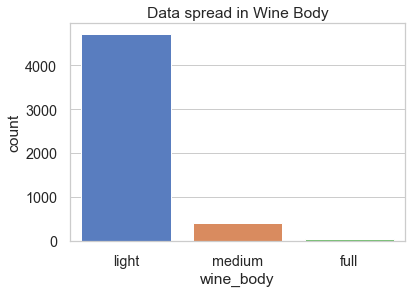

In [24]:
fig4 = sns.countplot(data = df_wine_clean, x = 'wine_body',).set_title("Data spread in Wine Body")

- Here we obseve that a majority of the wines are of **Medium body**

In [25]:
df_wine_clean['dry_sweet'].value_counts()

dry           4264
off-dry        827
bone dry        72
very sweet       0
sweet            0
Name: dry_sweet, dtype: int64

- Since we see 2 unused categories in the dry_sweet column, we can remove them.

In [26]:
df_wine_clean['dry_sweet'].cat.remove_unused_categories(inplace=True) # remove the unused categories

In [27]:
df_wine_clean['dry_sweet'].value_counts()

dry         4264
off-dry      827
bone dry      72
Name: dry_sweet, dtype: int64

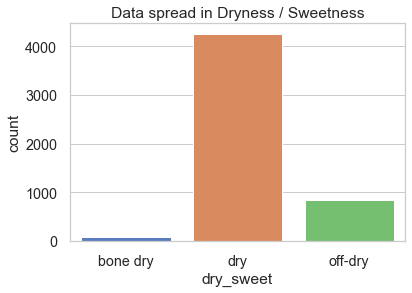

In [28]:
fig5 = sns.countplot(data = df_wine_clean, x = 'dry_sweet',).set_title("Data spread in Dryness / Sweetness")

- Here we obseve that a majority of the wines are of **Dry** kind

Data spread analysis in the newly created catagories leads to the following:
- The dataset is concentrated to a narrow type of medium graded, light bodied, dry wines.

<a id=section402></a>

### 4.2 How are the ingredients correlated to each other?

Corelation plot of all the variables

In [29]:
round(df_wine_clean.corr(), 4)   

fixed acidity  volatile acidity  citric acid  \
fixed acidity                1.0000            0.2121       0.2992   
volatile acidity             0.2121            1.0000      -0.4198   
citric acid                  0.2992           -0.4198       1.0000   
residual sugar              -0.1053           -0.1766       0.1507   
chlorides                    0.3528            0.4477      -0.0465   
free sulfur dioxide         -0.2811           -0.3557       0.1624   
total sulfur dioxide        -0.3164           -0.4024       0.2241   
density                      0.4624            0.2991       0.0639   
pH                          -0.2519            0.2520      -0.3312   
sulphates                    0.2832            0.2224       0.0126   
alcohol                     -0.1076           -0.0672      -0.0015   
quality                     -0.0892           -0.2477       0.0960   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity                -0.1053     0.3528              -0.2811   
volatile acidity             -0.1766     0.4477              -0.3557   
citric acid                   0.1507    -0.0465               0.1624   
residual sugar                1.0000    -0.1477               0.4295   
chlorides                    -0.1477     1.0000              -0.2225   
free sulfur dioxide           0.4295    -0.2225               1.0000   
total sulfur dioxide          0.4980    -0.3237               0.7221   
density                       0.5158     0.4628               0.0329   
pH                           -0.2480     0.1299              -0.1612   
sulphates                    -0.1745     0.3082              -0.1980   
alcohol                      -0.3240    -0.3153              -0.1804   
quality                      -0.0630    -0.2368               0.0790   

                      total sulfur dioxide  density      pH  sulphates  \
fixed acidity                      -0.3164   0.4624 -0.2519     0.2832   
volatile acidity                   -0.4024   0.2991  0.2520     0.2224   
citric acid                         0.2241   0.0639 -0.3312     0.0126   
residual sugar                      0.4980   0.5158 -0.2480    -0.1745   
chlorides                          -0.3237   0.4628  0.1299     0.3082   
free sulfur dioxide                 0.7221   0.0329 -0.1612    -0.1980   
total sulfur dioxide                1.0000   0.0302 -0.2353    -0.2762   
density                             0.0302   1.0000  0.0581     0.2687   
pH                                 -0.2353   0.0581  1.0000     0.2453   
sulphates                          -0.2762   0.2687  0.2453     1.0000   
alcohol                            -0.2620  -0.6972  0.0830     0.0098   
quality                            -0.0456  -0.3411  0.0482     0.0666   

                      alcohol  quality  
fixed acidity         -0.1076  -0.0892  
volatile acidity      -0.0672  -0.2477  
citric acid           -0.0015   0.0960  
residual sugar        -0.3240  -0.0630  
chlorides             -0.3153  -0.2368  
free sulfur dioxide   -0.1804   0.0790  
total sulfur dioxide  -0.2620  -0.0456  
density               -0.6972  -0.3411  
pH                     0.0830   0.0482  
sulphates              0.0098   0.0666  
alcohol                1.0000   0.4808  
quality                0.4808   1.0000

Using Heatmap to visualise this corelation

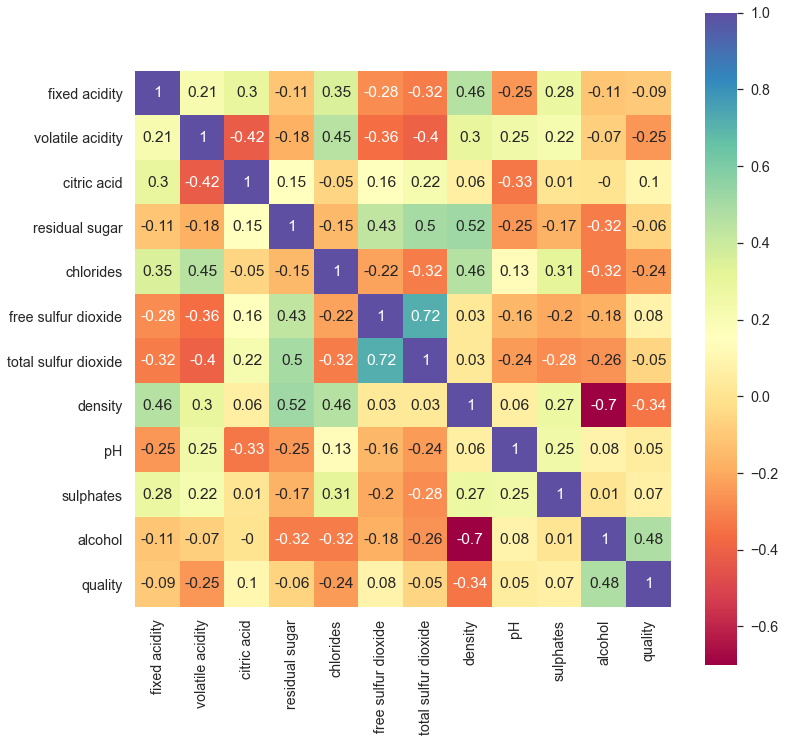

In [30]:
plt.figure(figsize=(12,12))
fig6 = sns.heatmap(round(df_wine_clean.corr(),2), annot = True, square = True, cmap = 'Spectral')

Examination of the corelation plots leads us to build groups of variables affecting Quality and its factors

- Variables affecting **Quality** (grp_qlt)
    - Alcohol, Density, Chlorides, volatile acidity
    
- Variables affecting **Alcohol** (grp_alc)
    - Density, Chlorides, Residual sugar 
    
- Variables affecting **Density** (grp_den)
    - Alcohol, Chlorides, Residual sugar, Fixed acidity
    
- Variables affecting **Chlorides** (grp_clo)
    - Alcohol, Sulphates, Density, Total sulfur dioxide, Free sulfur dioxide, Fixed acidity, Volatile acidity

- Variables affecting **Volatile acidity** (grp_voa)
    - Sulphates, Free sulfur dioxide, Chlorides, Fixed acidity, Citric Acid

In [31]:
# list of the columns of interest based on the correlation plots 
grp_qlt = ['alcohol', 'density','chlorides', 'volatile acidity']          # variables affect Quality
grp_alc = ['density', 'chlorides','residual sugar']                       # variables affect Alcohol
grp_den = ['alcohol', 'chlorides','residual sugar', 'fixed acidity' ]     # variables affect Density
grp_clo1 = ['alcohol', 'sulphates','density']                             # variables affect chlorides grp1
grp_clo2 = ['total sulfur dioxide','free sulfur dioxide',
            'fixed acidity','volatile acidity' ]                          # variables affect chlorides grp2
grp_voa = ['sulphates','free sulfur dioxide','chlorides',
           'fixed acidity', 'citric acid']                                # variables affect volatile acidity

<a id=section403></a>

### 4.3. What are the variables that correlate with the Quality rating?

#### Cross plot variables that interact with Quality Rating

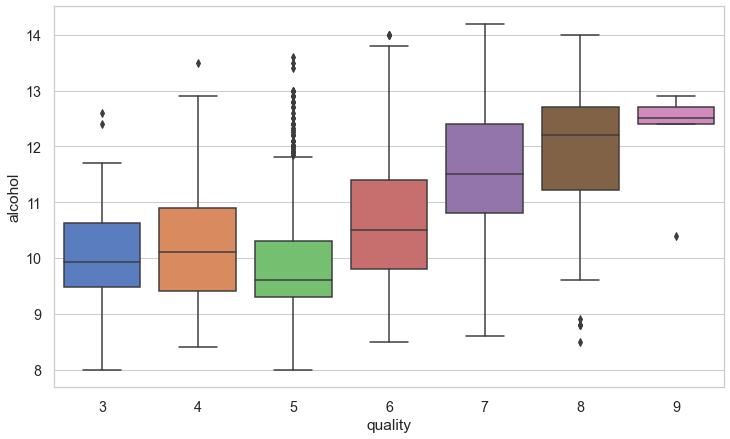

In [32]:
plt.figure(figsize=(12,7))
fig7 = sns.boxplot(data=df_wine_clean,x='quality',y="alcohol")

- Alcohol content **increases** with higher Quality

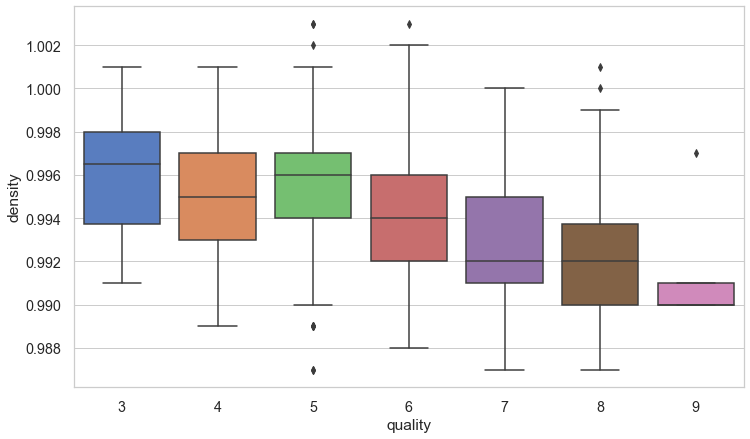

In [33]:
plt.figure(figsize=(12,7))
fig8 = sns.boxplot(data=df_wine_clean,x='quality',y="density")

- As the Quality increases the density **decreases**. This is an expected result as the density and alcohol content are directly related.

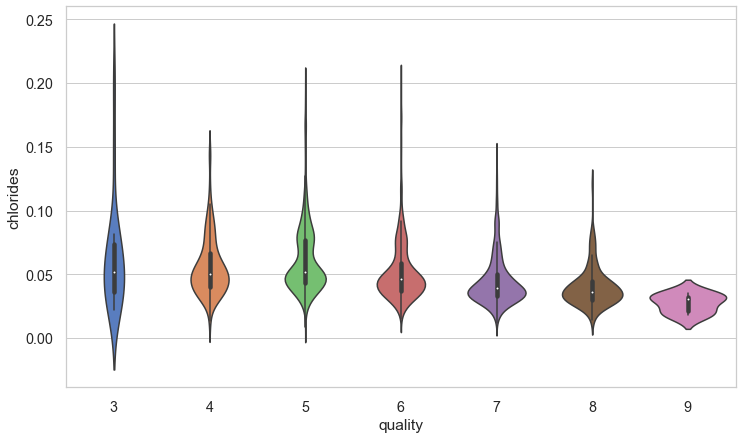

In [34]:
plt.figure(figsize=(12,7))
fig9 = sns.violinplot(data=df_wine_clean,x="quality",y="chlorides")

- Chloride levels **decrease** with quality rating. However given that the the data range  is quiet narrow, the relationship may not be as significant as believed at first glance.

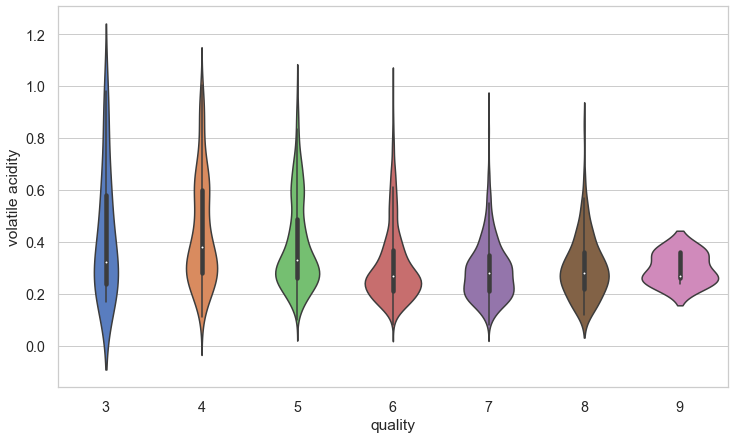

In [35]:
plt.figure(figsize=(12,7))
fig10 = sns.violinplot(data=df_wine_clean,x='quality',y="volatile acidity")

- **Decrease** in volatile acidity levels are see as the **ratings increase**. This is expected as the higher quality wines will be expected to have better control on the acetic acid levels in order to avoid / eliminate the vinegar like taste that this brings.

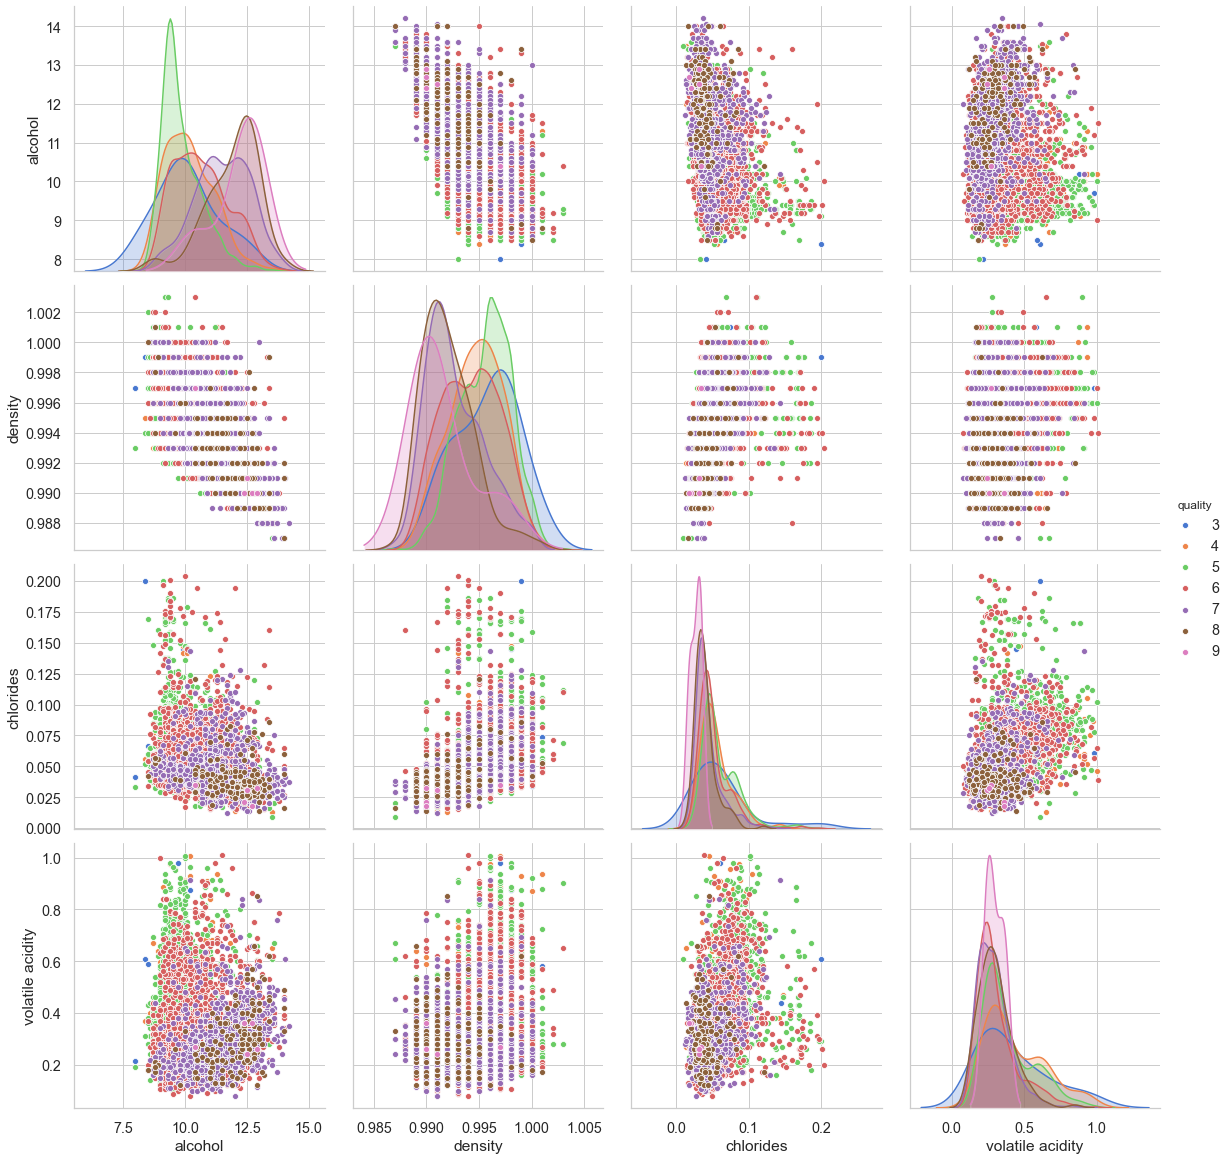

In [36]:
fig11 = sns.pairplot(df_wine_clean,x_vars=grp_qlt,y_vars=grp_qlt,
                     hue = 'quality',diag_kind = 'kde',height = 4)


The cross plot here brings interesting relatonships
- Chlorides and Volatile Acidity are **very tightly packed in distribution** across all quality grades
    - These parameters may therefore not have an influence on the final rating of a wine
- Alcohol and Density levels show a relationship to wine Quality ratings
    - **Higher the wine rating Lower is the Density**
    - **Higher the wine rating Higher is the Alcohol level**

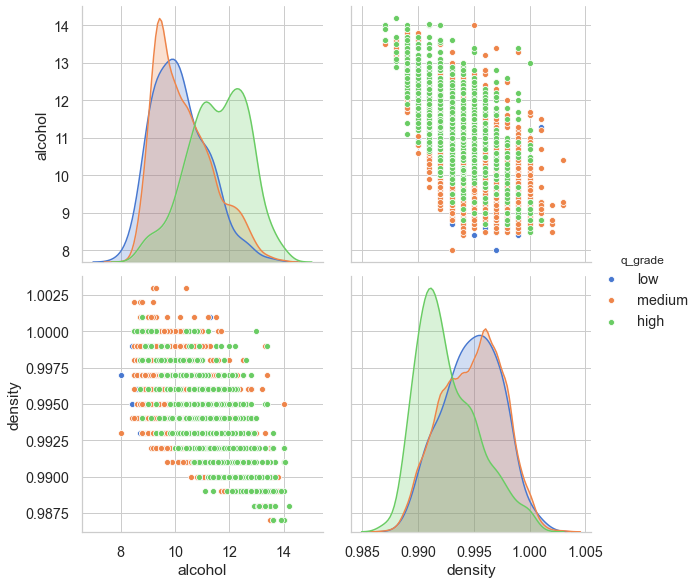

In [37]:
fig12 = sns.pairplot(df_wine_clean,x_vars=('alcohol','density'),y_vars=('alcohol','density'),
                     hue = 'q_grade',diag_kind = 'kde',height = 4)

- Again highlighting the relationship between alcohol content and density when grouped by Quality grade bins
    - High quality wines tend to have higher alcohol content with lower density

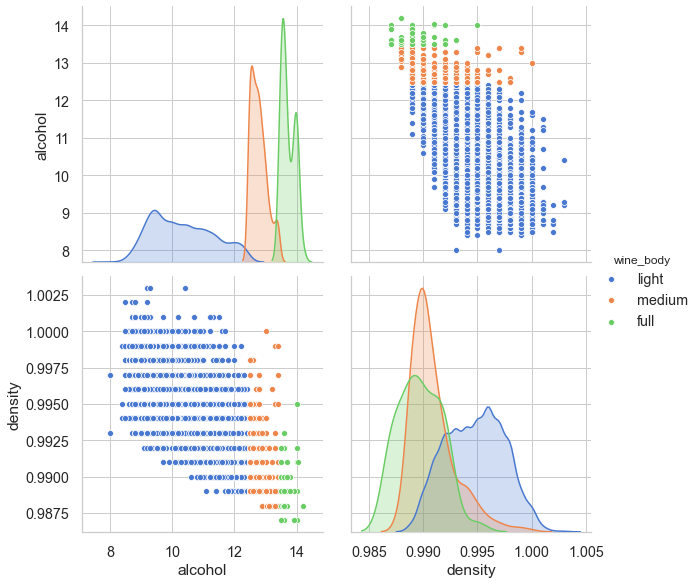

In [38]:
fig13 = sns.pairplot(df_wine_clean,x_vars=('alcohol','density'),y_vars=('alcohol','density'),
                     hue = 'wine_body',diag_kind = 'kde',height = 4)

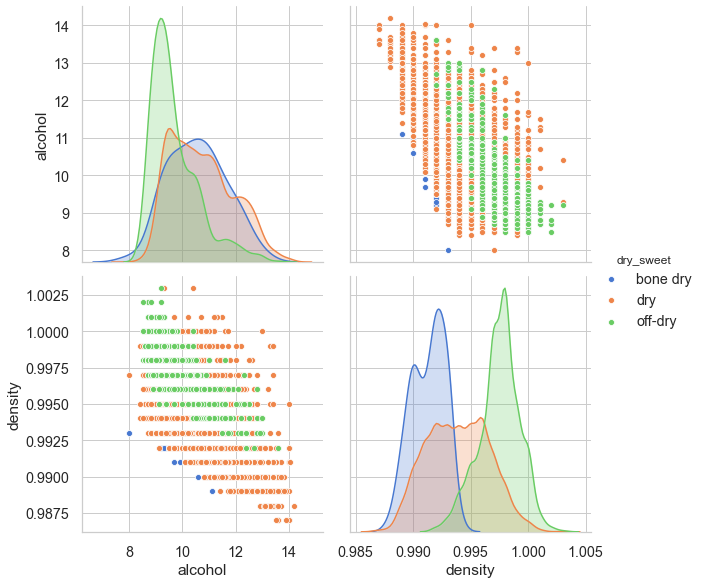

In [39]:
fig14 = sns.pairplot(df_wine_clean,x_vars=('alcohol','density'),y_vars=('alcohol','density'),
                     hue = 'dry_sweet',diag_kind = 'kde',height = 4)

- Alcohol levels in off-dry wines are at much higher levels than others
- Density increases as the sweetness level increases ie: related to residual sugar

<a id=section404></a>

### 4.4 What are the variables that correlate with the Alcohol Content?

#### Cross plot variables that interact with alcohol content

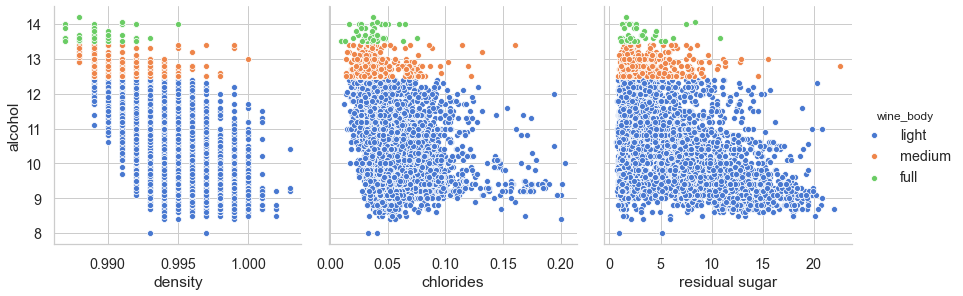

In [40]:
fig15 = sns.pairplot(df_wine_clean,x_vars=grp_alc,y_vars='alcohol',hue = 'wine_body',height = 4)

- Both density and residual sugar **decrease** as the alcohol content **increases**

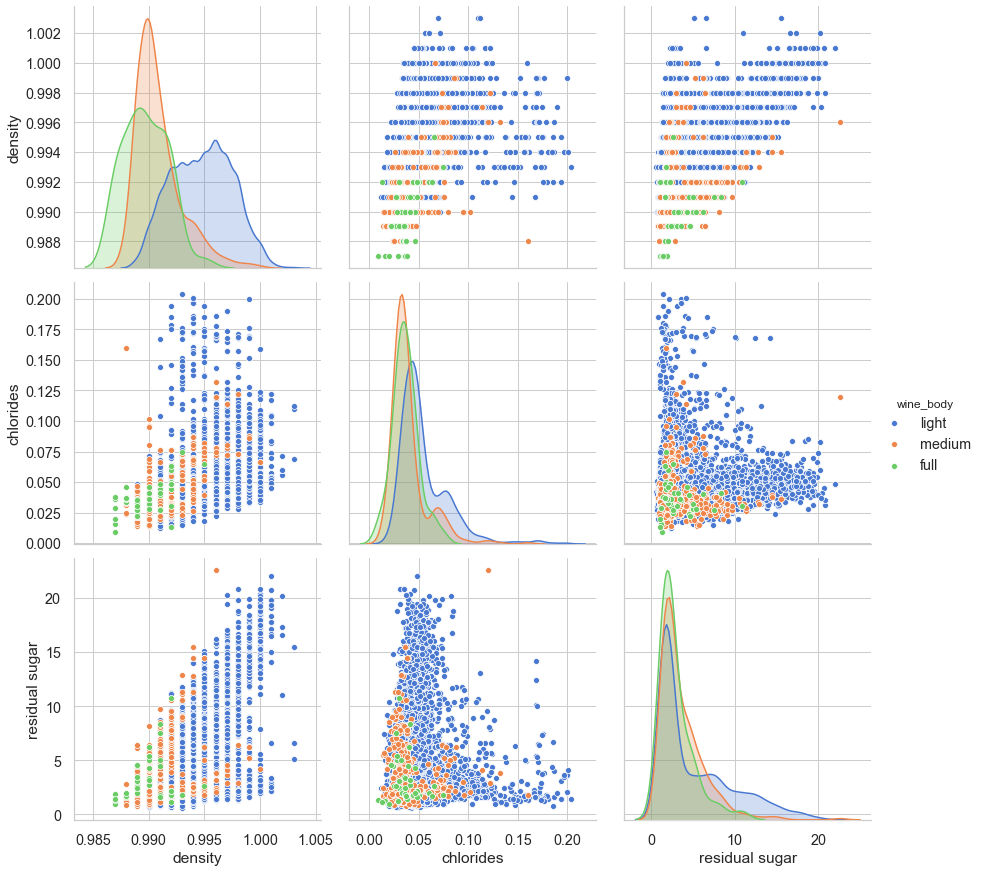

In [41]:
fig16 = sns.pairplot(df_wine_clean,x_vars=grp_alc,y_vars=grp_alc,
                     hue = 'wine_body',diag_kind = 'kde',height = 4)

- Chlorides and Residual Sugar show some interaction and we plot this by wine grade below

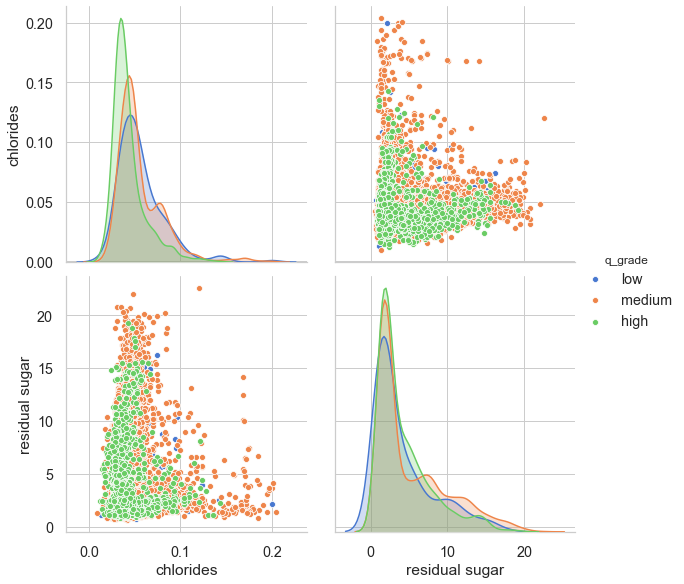

In [42]:
fig17 = sns.pairplot(df_wine_clean,x_vars=('chlorides','residual sugar'),y_vars=('chlorides','residual sugar'),
                     hue = 'q_grade',diag_kind = 'kde',height = 4)

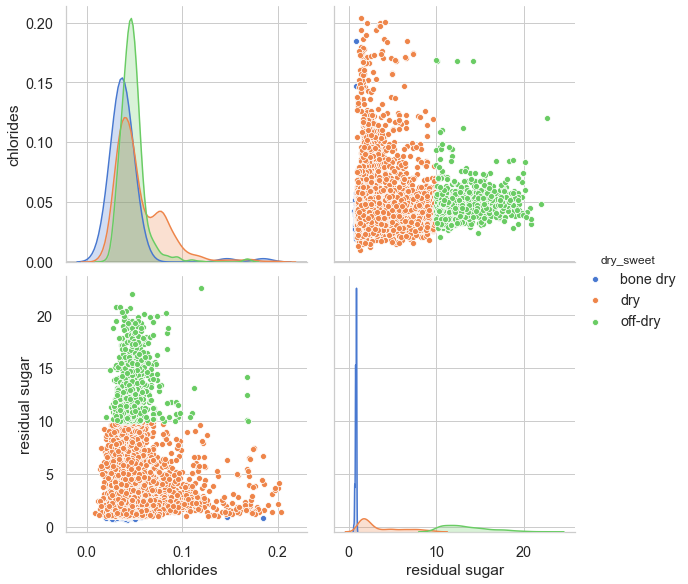

In [43]:
fig18 = sns.pairplot(df_wine_clean,x_vars=('chlorides','residual sugar'),y_vars=('chlorides','residual sugar'),
                     hue = 'dry_sweet',diag_kind = 'kde',height = 4)

Factors that interact and correlate to alcohol content:

- Both density and residual sugar **decrease** as the alcohol content **increases**
- residual sugar and density
    - a positive correlation exists between them 
    - a negative correlation of these two to alcohol content
- chlorides and residual sugar
    - a distinct V shaped spread in the cross plot suggesting perhaps 2 distinct families of wines

<a id=section405></a>

### 4.5. What are the variables that correlate with the Density of a wine?

- Cross plot varaibles that correlate with Density

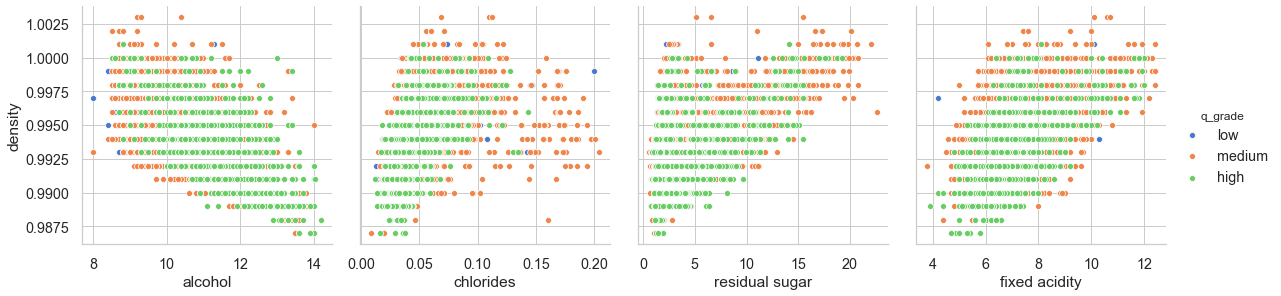

In [44]:
fig19 = sns.pairplot(df_wine_clean,x_vars=grp_den,y_vars='density',hue = 'q_grade',height = 4)

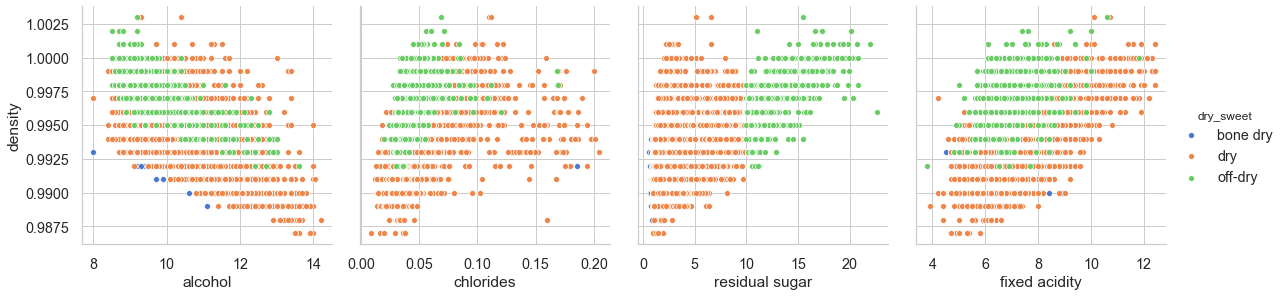

In [45]:
fig20 = sns.pairplot(df_wine_clean,x_vars=grp_den,y_vars='density',hue = 'dry_sweet',height = 4)

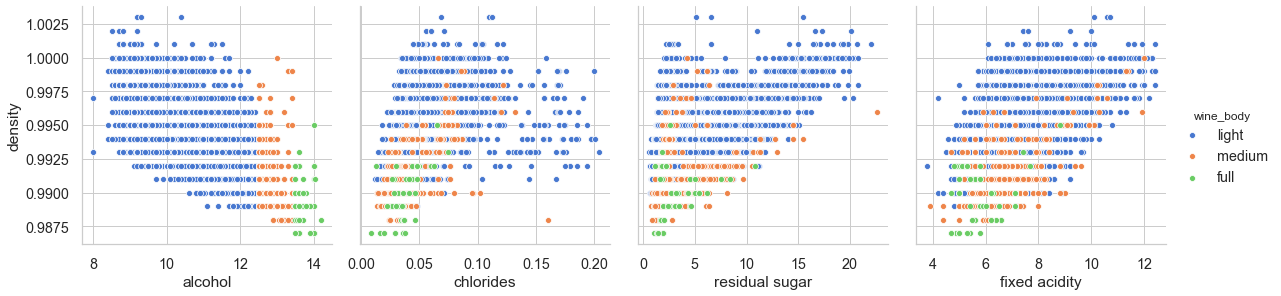

In [46]:
fig21 = sns.pairplot(df_wine_clean,x_vars=grp_den,y_vars='density',hue = 'wine_body',height = 4)

- Since density has a positive relation with residual sugar, we will use Dryness / Sweetness category to gain any insights

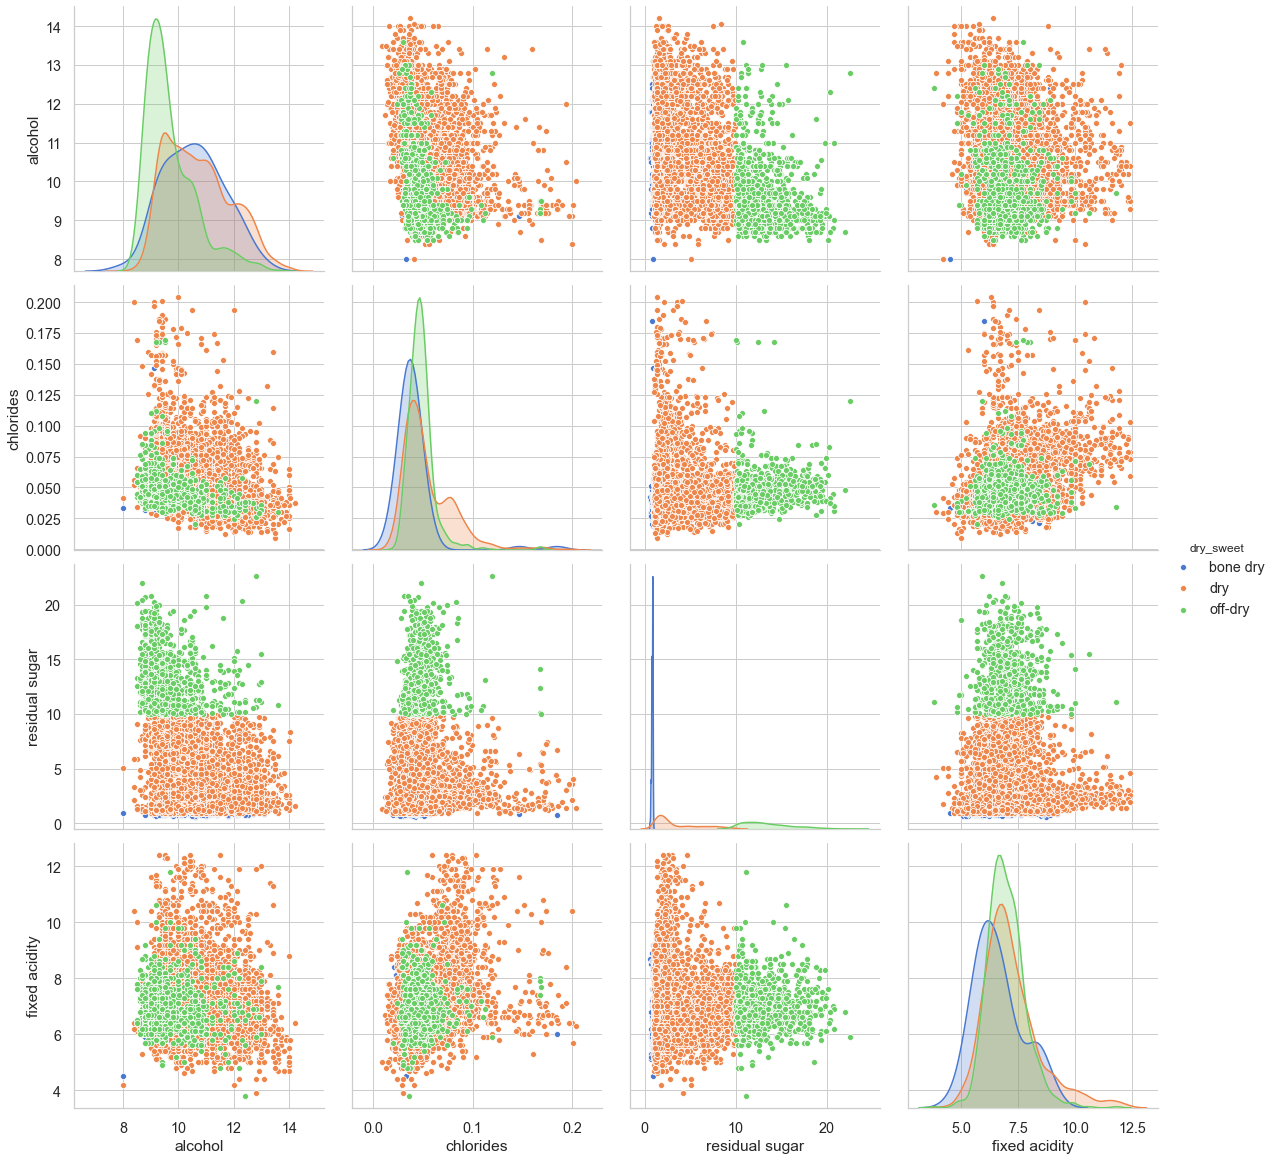

In [47]:
fig22 = sns.pairplot(df_wine_clean,x_vars=grp_den,y_vars=grp_den,
                     hue = 'dry_sweet',diag_kind = 'kde',height = 4)

- Since density has a negative relation with alcohol content, we will use wine body category to gain any insights

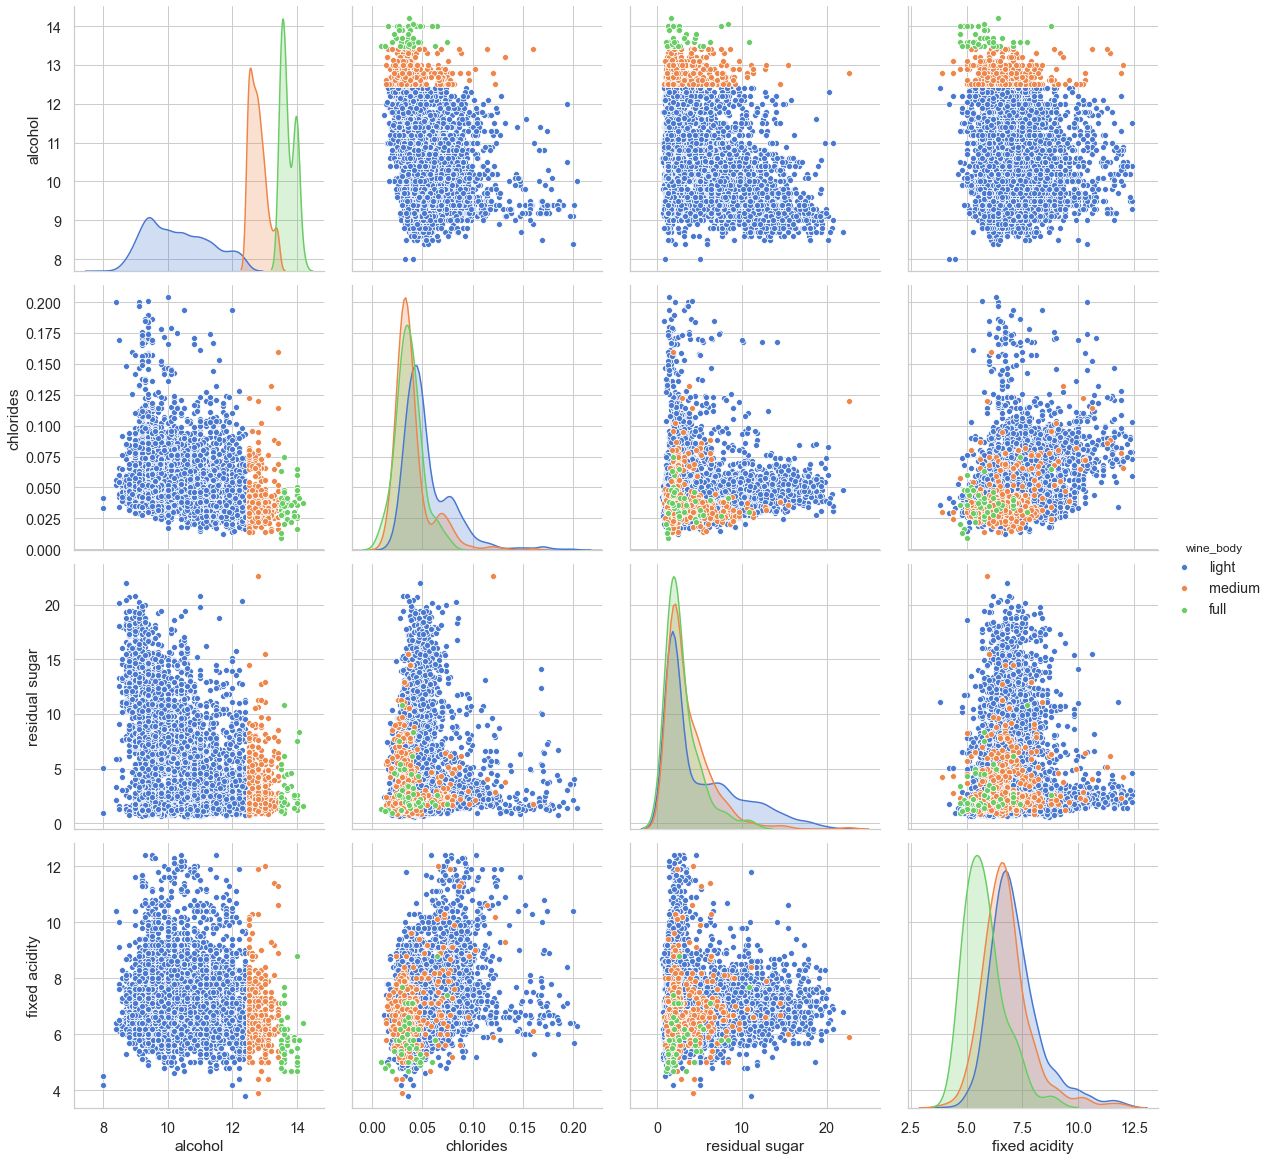

In [48]:
fig23 = sns.pairplot(df_wine_clean,x_vars=grp_den,y_vars=grp_den,
                     hue = 'wine_body',diag_kind = 'kde',height = 4)

Factors that interact and correlate to density:

- Density has the following relationships:
    - **negative** correlation to alcohol content
    - **positive** correlation to chlorides, residual sugar and fixed acidity
    
We have already seen the cross plot interactions of all these variables earlier except for fixed acidity

- Fixed Acidity does not have significant seperation based on wine body and therefore indirectly density
- The full bodies wines ie: comparitively denser wines, are grouped together and have lower fixed acidity

<a id=section406></a>

### 4.6 What are the variables that correlate with the Chloride Content?

- Cross plot variables that correlate with Chloride content and grouped by Quality grade

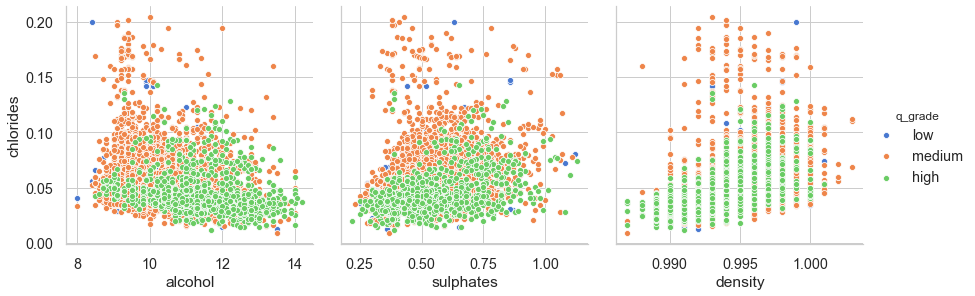

In [49]:
fig24 = sns.pairplot(df_wine_clean,x_vars=grp_clo1,y_vars='chlorides',hue = 'q_grade',height = 4)

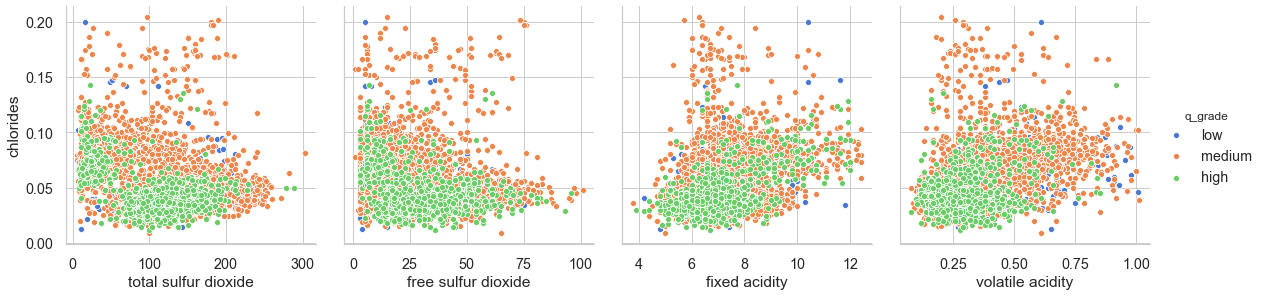

In [50]:
fig25 = sns.pairplot(df_wine_clean,x_vars=grp_clo2,y_vars='chlorides',hue = 'q_grade',height = 4)

- Cross plots of the variables indicate that data points are too spread out with mild correlation
- Data categorization by quality grades show that the higher quality wines tend to have lower levels of chlorides

<a id=section407></a>

### 4.7 What are the variables that correlate with the Volatile Acidity?

 - Cross plots of the variables that correlate with volatile acidity

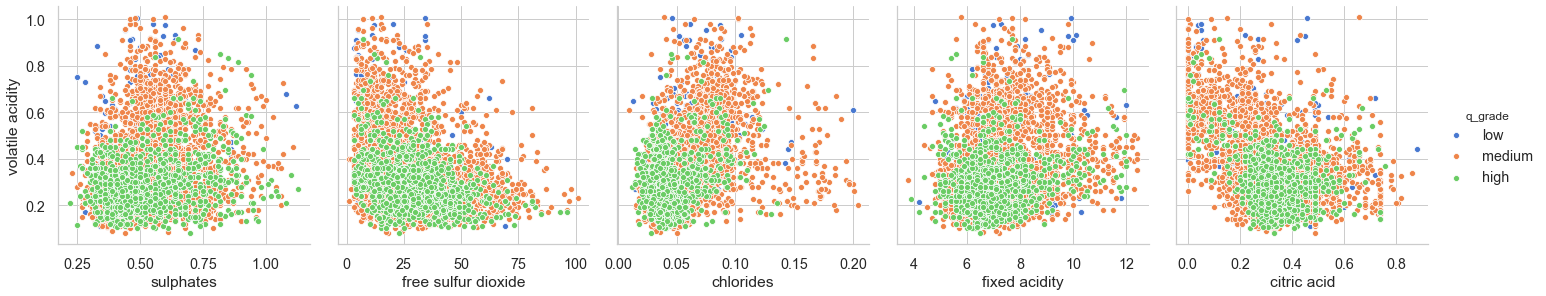

In [51]:
fig26 = sns.pairplot(df_wine_clean,x_vars=grp_voa,y_vars='volatile acidity',hue = 'q_grade',height = 4)

- The higher quality wines tend to have lower levels of volatile acidity ie: acetic acid levels
- They also tend to have lower levels of the ingredients that correlate with Volatile Acidity

<a id=section5></a>

## 5. Conclusion 

###### Main Observations

- There is **NO** data available on the actual type of wine ie: Red, White or Rosé

- The majority of the data is concentrated to a narrow group of **medium graded, light bodied, dry wines.**

- The following properties are seen to have a correlation with the Quality rating
    - Major -> Alcohol content and  Density of the wine
    - Minor -> Chlorides and Volatile acidity
    
- **Higher** quality of wines have **higher** alcohol content
    - The 'Human factor' in wine tasting?
    
- Density and residual sugar levels **lower** as the alcohol content **increases**
    - This relates to point 1) ie: higher alcohol levels mean lower density and residual sugar
    
- Chloride levels are **lower** in the **higher** quality wines
    - However given that the the data range is quiet narrow, the relationship may not be as significant as believed at first glance.
    
- **Decrease** in volatile acidity levels are seen as the quality ratings **increase**.
    - This should be obvious as the higher quality wines will be expected to have low volatile acidity ie: acetic acid levels.

- Chlorides and Volatile Acidity are very tightly packed in distribution across all wine quality grades. These parameters may therefore not have an influence on the final rating of a wine.
    - Data categorization by quality grades show that the higher quality wines tend to have lower levels of chlorides
    - The higher quality wines tend to have lower levels of volatile acidity ie: acetic acid levels


###### Minor Observations

- Alcohol levels in off-dry wines are at much higher levels than others
- Density increases as the sweetness level increases ie: related to residual sugar
- chlorides and residual sugar have a distinct V shaped spread in the cross plot 
    - suggesting perhaps 2 distinct families of wines
- Fixed Acidity does not have significant seperation based on wine body, and therefore indirectly, density
- The full bodied wines ie: comparitively denser wines, are grouped together and have lower fixed acidity


##### Conclusion

- **Higher quality wines tend to have higher levels of alcohol but lower levels of residual sugar, chlorides and volatile acidity**
- **There is no clear combination of physiochemical properties that can be summarised by EDA that would point towards a high quality wine**
- **This analysis will help us to choose a __machine learning model__ which can be applied to predict wine quality in a test dataset.** 

<a id=section6></a>

## 6. Recommendations

**Recommendations are two fold and can be done concurrently**

- Invest in Data collection 
    - Data needs to be collected on the current dataset to include the type of wine ie: Red, White or Rosé
    - Any additional information may prove to be useful and is recommended to be collected, eg: 
        - Variety of grape
        - Area of origin of the wine - local, regional, national, international
        - Brands of the wines analysed
        
- Use of current dataset to select and build / train Machine Learning Models which can be used to predict the quality of wines from its physiochemical properties
    - As and when the data from the above Data collection is made available, the new information can be used to improve the current model, or if necessary, select a more appropriate model based on the new updated information.
        

